In [2]:
import math
import collections
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pd.options.display.max_rows = 10

In [4]:
path = os.getcwd() + '\\annual-hazardous-liquid-2010-present'
files = os.listdir(path)

In [5]:
files_xlsx = [f for f in files if f.startswith('annual')]

In [6]:
liquid_trans = []

for f in files_xlsx:
    data = pd.read_excel('annual-hazardous-liquid-2010-present\\' + f, sheet_name=None,header=2)
    liquid_trans.append(data)

In [8]:
liquid_trans

[{'HL AR Part A to E':          DATAFILE_AS_OF  REPORT_YEAR  REPORT_NUMBER  SUPPLEMENTAL_NUMBER  \
  0   2021-12-01 14:19:09         2010       20110334                12436   
  1   2021-12-01 14:19:09         2010       20110333                10345   
  2   2021-12-01 14:19:09         2010       20110192                10194   
  3   2021-12-01 14:19:09         2010       20110079                10080   
  4   2021-12-01 14:19:09         2010       20110373                10391   
  ..                  ...          ...            ...                  ...   
  488 2021-12-01 14:19:09         2010       20110414                11829   
  489 2021-12-01 14:19:09         2010       20110459                10506   
  490 2021-12-01 14:19:09         2010       20110023                10023   
  491 2021-12-01 14:19:09         2010       20110048                10048   
  492 2021-12-01 14:19:09         2010       20130537                12507   
  
       OPERATOR_ID                      

In [11]:
len(liquid_trans)
liquid_trans[10].keys()

dict_keys(['HL AR Part A to E', 'HL AR Part F to G', 'HL AR Part H', 'HL AR Part I', 'HL AR Part J', 'HL AR Part K', 'HL AR Part L', 'HL AR Part M', 'HL AR Part N to O', 'HL AR Part P', 'HL AR Part Q'])

In [12]:
liquid_trans[10]['HL AR Part A to E']

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA4STREET,PARTA4CITY,PARTA4STATE,PARTA4ZIP,...,PARTE2020HF,PARTE2020LF,PARTE2020TOTAL,PARTETOTAL,PARTETOTALHF,PARTETOTALLF,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV
0,2021-12-01 16:32:57,2020,20210071,18129,117,AIR PRODUCTS & CHEMICALS INC,7201 HAMILTON BLVD.,ALLENTOWN,PA,18195-1501,...,0.000,0.0,0.000,12.910,12.910,0.000,INITIAL,2021-03-24 15:58:25,2021-03-24 15:58:25,7000-1.1 (Rev. 01-2020)
1,2021-12-01 16:32:57,2020,20210605,18847,300,"PLAINS PIPELINE, L.P.","333 CLAY STREET, SUITE 1900",HOUSTON,TX,77002,...,32.020,0.0,32.020,7265.640,5615.620,1650.020,SUPPLEMENTAL,2021-06-15 17:27:20,2021-07-29 10:42:12,7000-1.1 (Rev. 01-2020)
2,2021-12-01 16:32:57,2020,20210607,18715,300,"PLAINS PIPELINE, L.P.","333 CLAY STREET, SUITE 1900",HOUSTON,TX,77002,...,0.000,0.0,0.000,48.070,48.070,0.000,INITIAL,2021-06-15 17:32:14,2021-06-15 17:32:14,7000-1.1 (Rev. 01-2020)
3,2021-12-01 16:32:57,2020,20210299,18396,395,AMOCO OIL CO,30 S. WACKER DRIVE,CHICAGO,IL,60606,...,0.000,0.0,0.000,101.400,84.000,17.400,INITIAL,2021-06-10 15:36:13,2021-06-10 15:36:13,7000-1.1 (Rev. 01-2020)
4,2021-12-01 16:32:57,2020,20210428,18530,473,"WESTERN MIDSTREAM PARTNERS, LP",9950 WOODLOCH FOREST DR SUITE 2800,THE WOODLANDS,TX,77380,...,0.660,0.0,0.660,463.460,434.960,28.500,INITIAL,2021-06-14 15:06:56,2021-06-14 15:06:56,7000-1.1 (Rev. 01-2020)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,2021-12-01 16:32:57,2020,20210440,18542,40252,"COGENT MIDSTREAM LOGISTICS, LLC",2000 MCKINNEY AVENUE SUITE 400,DALLAS,TX,75201,...,4.590,0.0,4.590,4.590,4.590,0.000,INITIAL,2021-06-14 15:52:36,2021-06-14 15:52:36,7000-1.1 (Rev. 01-2020)
704,2021-12-01 16:32:57,2020,20210127,18197,99001,DEFENSE FUEL SUPPLY POINT,DEFENSE LOGISTICS AGENCY-ENERGY 8725 JOHN J. K...,FORT BELVOIR,VA,22060,...,0.000,0.0,0.000,0.530,0.000,0.530,INITIAL,2021-05-13 11:43:43,2021-05-13 11:43:43,7000-1.1 (Rev. 01-2020)
705,2021-12-01 16:32:57,2020,20210412,18512,99002,TAMPA AIRPORT PIPELINE CORPORATION,P. O. Box 35236,Sarasota,FL,34242,...,0.358,0.0,0.358,10.500,10.500,0.000,INITIAL,2021-06-14 11:32:32,2021-06-14 11:32:32,7000-1.1 (Rev. 01-2020)
706,2021-12-01 16:32:57,2020,20210645,18755,99031,CITGO PETROLEUM CORPORATION (TERMINALS),1293 ELDRIDGE PARKWAY,Houston,TX,77077,...,0.097,0.0,0.097,14.158,5.946,8.212,INITIAL,2021-06-15 19:47:58,2021-06-15 19:47:58,7000-1.1 (Rev. 01-2020)


In [7]:
#combining multiple years
#Part A-E
a_e_sheets_list = []
for sheet in liquid_trans:
    a_e_sheets_list.append(sheet['HL AR Part A to E'])
    
a_e_sheets = pd.concat(a_e_sheets_list, axis = 0)

#Part H
h_sheets_list = []
for sheet in liquid_trans:
    h_sheets_list.append(sheet['HL AR Part H'])
    
h_sheets = pd.concat(h_sheets_list, axis = 0)

#Part I
i_sheets_list = []
for sheet in liquid_trans:
    i_sheets_list.append(sheet['HL AR Part I'])
    
i_sheets = pd.concat(i_sheets_list, axis = 0)


#Part J
j_sheets_list = []
for sheet in liquid_trans:
    j_sheets_list.append(sheet['HL AR Part J'])
    
j_sheets = pd.concat(j_sheets_list, axis = 0)


In [8]:
#Creating new dataframes only including assessed fields
df_cp = pd.pivot_table(data=a_e_sheets,index='REPORT_YEAR',values=['PARTDONCPB','PARTDONCPC','PARTDONCUB','PARTDONCUC'],aggfunc=np.sum)
df_cp.loc[:]*=1.60934

df_km = pd.pivot_table(data=a_e_sheets,index='REPORT_YEAR',values=['PARTDONTOTAL'],aggfunc=np.sum)
df_km.loc[:]*=1.60934

df_material = pd.pivot_table(data=a_e_sheets,index='REPORT_YEAR',values=['PARTDONCPB','PARTDONCPC','PARTDONCUB','PARTDONCUC','PARTDONCUP','PARTDONCUO'],aggfunc=np.sum)
df_material['Steel'] = df_material['PARTDONCPB']+df_material['PARTDONCPC']+df_material['PARTDONCUB']+df_material['PARTDONCUC']
df_material = df_material.drop(columns = ['PARTDONCPB','PARTDONCPC','PARTDONCUB','PARTDONCUC'])
df_material.loc[:]*=1.60934


pipe_diameter_cat = [cat for cat in list(h_sheets.columns) if (cat.startswith('PARTHON') and cat != 'PARTHON_OTHER_PIPE_DETAIL')]
df_diameter = pd.pivot_table(data=h_sheets,index='REPORT_YEAR',values=pipe_diameter_cat,aggfunc=np.sum)
df_diameter.loc[:]*=1.60934

df_diameter_short = pd.DataFrame()
df_diameter_short['d<=4'] = df_diameter['PARTHON4LESS']
df_diameter_short['4<d<=10'] = df_diameter['PARTHON6'] + df_diameter['PARTHON8'] + df_diameter['PARTHON10']
df_diameter_short['10<d<=20'] = df_diameter['PARTHON12'] + df_diameter['PARTHON14'] + df_diameter['PARTHON16'] + df_diameter['PARTHON18']+ df_diameter['PARTHON20']
df_diameter_short['20<d<=28'] = df_diameter['PARTHON22'] + df_diameter['PARTHON24'] + df_diameter['PARTHON26']+ df_diameter['PARTHON28']
df_diameter_short['28<d'] = df_diameter['PARTHON30'] + df_diameter['PARTHON32'] + df_diameter['PARTHON34']+ df_diameter['PARTHON36']+ df_diameter['PARTHON38']+ df_diameter['PARTHON40']+ df_diameter['PARTHON42']+ df_diameter['PARTHON44']+ df_diameter['PARTHON46']+ df_diameter['PARTHON48']+ df_diameter['PARTHON50']+ df_diameter['PARTHON52']+ df_diameter['PARTHON54']+ df_diameter['PARTHON56']+ df_diameter['PARTHON58OVER']


installation_decade = [cat for cat in list(i_sheets.columns) if (cat.startswith('PARTI') and cat != 'PARTITOTAL')]
installation_decade
df_installation = pd.pivot_table(data=i_sheets,index='REPORT_YEAR',values=installation_decade,aggfunc=np.sum)
df_installation.loc[:]*=1.60934

df_smys_location = pd.pivot_table(data=j_sheets,index='REPORT_YEAR',values=['PARTJST20MOREON', 'PARTJSTNR20LESSON', 'PARTJSTR20LESSON', 'PARTJSTNR_UNK_ON', 'PARTJSTR_UNK_ON'],aggfunc=np.sum)
df_smys = df_smys_location
df_smys['LessThan20OnTotal'] = df_smys['PARTJSTNR20LESSON'] + df_smys['PARTJSTR20LESSON']
df_smys['UknOnTotal'] = df_smys['PARTJSTNR_UNK_ON'] + df_smys['PARTJSTR_UNK_ON']
df_smys = df_smys.drop(columns = ['PARTJSTNR_UNK_ON', 'PARTJSTR_UNK_ON', 'PARTJSTR20LESSON', 'PARTJSTNR20LESSON'])
df_smys.loc[:]*=1.60934

#I'm not sure how to change the indexes to column headers. Used a different way to get results (below)
#df_commodity = pd.pivot_table(data=a_e_sheets,index=['REPORT_YEAR', 'PARTA5COMMODITY'],values=['PARTDONTOTAL'],aggfunc=np.sum)
#df_commodity.reset_index(level = ['PARTA5COMMODITY'])

#Cannot do location or class as the pipes with 20% and higher smys are not broken down based on location (majority of the pipelines)

In [9]:
commodity_cat = list(a_e_sheets['PARTA5COMMODITY'].unique())
pipe_commodity = {}
for i in range(0, len(liquid_trans)):
    pipe_commodity[2010+i]={}
    for commodity in commodity_cat:
        km = round(liquid_trans[i]['HL AR Part A to E'][liquid_trans[i]['HL AR Part A to E'].PARTA5COMMODITY==commodity]['PARTDONTOTAL'].sum()*1.60934)
        pipe_commodity[2010+i][commodity] = km

df_commodity = pd.DataFrame.from_dict(pipe_commodity, orient = 'index')

In [10]:
mileage_df_hl = pd.concat([df_km, df_cp, df_material, df_commodity, df_diameter, df_diameter_short, df_installation, df_smys], axis = 1)

In [196]:
mileage_df_hl.to_csv('mileage_df_hl.csv')

In [11]:
#Creating percentage dataframes
total_steel = df_cp.sum(1)
df_cp_percent = df_cp[df_cp.columns[:]].div(total_steel, 0)*100

df_material_percent = df_material[df_material.columns[:]].div(df_material.sum(1), 0)*100

df_diameter_short_percent = df_diameter_short[df_diameter_short.columns[:]].div(df_diameter_short.sum(1),0)*100

df_installation_percent = df_installation[df_installation.columns[:]].div(df_installation.sum(1),0)*100

df_smys_percent = df_smys[df_smys.columns[:]].div(df_smys.sum(1), 0)*100

df_commodity_percent = df_commodity[df_commodity.columns[:]].div(df_commodity.sum(1),0)*100


In [12]:
mileage_df_hl_percent = pd.concat([df_cp_percent, df_material_percent, df_commodity_percent, df_diameter_short_percent, df_installation_percent, df_smys_percent], axis = 1)

In [198]:
mileage_df_hl_percent.to_csv('mileage_df_hl_percent.csv')

In [20]:
df_material = df_material[['Steel', 'PARTDONCUP', 'PARTDONCUO']]

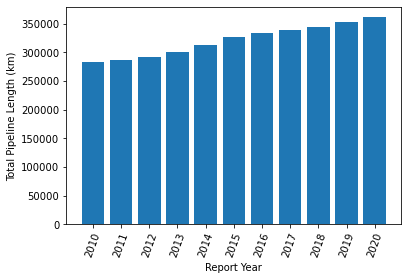

In [14]:
#bar graph
plt.bar(df_km.index,df_km['PARTDONTOTAL'])

#xticks 
plt.xticks(rotation=70) 
plt.xticks(df_km.index)

#x-axis labels 
plt.xlabel('Report Year') 

#y-axis labels 
plt.ylabel('Total Pipeline Length (km)') 
#plt.ylim(top = 400000)
#plt.yticks(np.arange(0, 550000, 50000))

#plot title 
#plt.title('Total Length of Pipelines Reported') 

#save plot 
plot_path = os.getcwd() + '\\HL Plots\\Total_km'
plt.savefig(plot_path, dpi=300,bbox_inches='tight') 

#display 
plt.show();

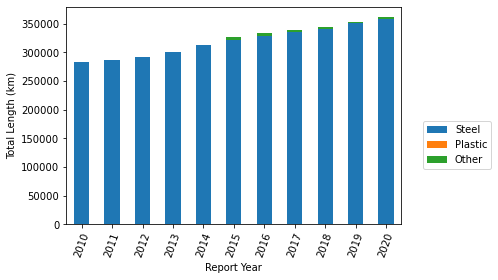

In [21]:
#bar graph
df_material.plot(kind= 'bar',stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=70) 
#plt.xticks(mileage_df.index)

#x-axis labels 
plt.xlabel('Report Year') 

#y-axis labels 
plt.ylabel('Total Length (km)') 
#plt.ylim([0, 500000])
#plt.yticks(np.arange(0, 550000, 50000)) 

#Legend
plt.legend(['Steel', 'Plastic','Other'], bbox_to_anchor=(1.05, 0.5), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\HL Plots\\Total_km_by_Material'
plt.savefig(plot_path, dpi=300,bbox_inches='tight') 

#display 
plt.show();

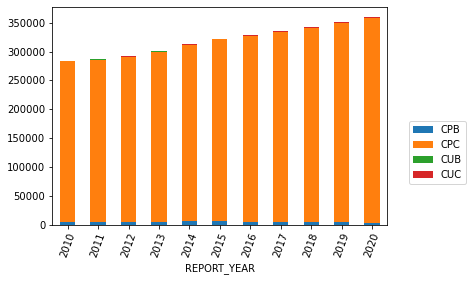

In [22]:
# plot a Stacked Bar Chart using matplotlib
df_cp.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=70) 

#Legend
plt.legend(['CPB', 'CPC', 'CUB', 'CUC'], bbox_to_anchor=(1.05, 0.5), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\HL Plots\\Coating'
plt.savefig(plot_path, dpi=300,bbox_inches='tight') 

In [25]:
df_installation_percent_short = df_installation_percent
df_installation_percent_short['Pre 1940s'] = df_installation_percent_short['PARTI192029']+df_installation_percent_short['PARTI193039']+df_installation_percent_short['PARTIPRE20']

In [36]:
df_installation_percent_short = df_installation_percent_short.drop(['PARTI192029', 'PARTI193039', 'PARTIPRE20'], axis = 1)

In [37]:
list(df_installation_percent_short)

['PARTI194049',
 'PARTI195059',
 'PARTI196069',
 'PARTI197079',
 'PARTI198089',
 'PARTI199099',
 'PARTI200009',
 'PARTI201019',
 'PARTI202029',
 'PARTIUNKWN',
 'Pre 1940s']

In [40]:
df_installation_percent_short = df_installation_percent_short[['Pre 1940s','PARTI194049','PARTI195059', 'PARTI196069', 'PARTI197079', 'PARTI198089', 
                               'PARTI199099','PARTI200009', 'PARTI201019', 'PARTI202029',]]

In [41]:
df_installation_percent_short

,Pre 1940s,PARTI194049,PARTI195059,PARTI196069,PARTI197079,PARTI198089,PARTI199099,PARTI200009,PARTI201019,PARTI202029
REPORT_YEAR,,,,,,,,,,
2010,4.166012,8.193767,17.799569,19.297065,16.934622,9.957105,10.100070,9.627968,1.051522,0.000000
2011,4.126707,8.438346,18.503557,18.697271,16.514111,9.360325,10.492511,9.214311,1.409499,0.000000
2012,3.906177,8.347378,18.611767,18.222423,16.105086,9.256838,10.247490,9.133687,2.937631,0.000000
2013,3.788371,7.982726,18.211101,17.921330,15.683253,8.987380,10.049154,8.889021,5.936295,0.000000
2014,3.606478,7.775934,17.518217,16.880973,15.043374,8.546449,9.536288,8.354745,9.875233,0.000000
...,...,...,...,...,...,...,...,...,...,...
2016,3.627940,7.223661,16.673747,15.704388,14.222715,8.200605,8.920677,7.994235,14.141017,0.000000
2017,3.555629,7.202893,16.174833,15.843565,13.870559,8.058580,8.781668,7.796996,15.668064,0.000000
2018,3.391570,6.726973,15.417333,15.604712,13.673842,8.035416,8.534250,7.735317,16.871731,0.000000


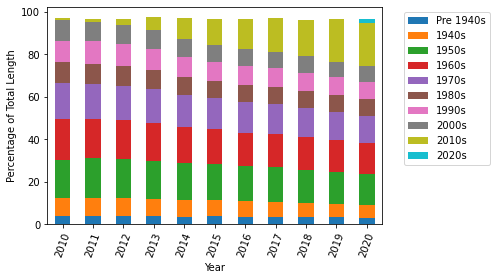

In [42]:
#Stacked bar graph
df_installation_percent_short.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('Year') 


#y-axis labels 
plt.ylabel('Percentage of Total Length') 
#plt.ylim([0, 500000])
#plt.yticks(np.arange(0, 110, 10))

#plot title 
#plt.title('Ditribution of Pipeline Length based on Year of Installation') 

#Legend
plt.legend(['Pre 1940s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s', 'Unknown'], bbox_to_anchor=(1.05, 1), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\HL Plots\\installation'
plt.savefig(plot_path, dpi=300,bbox_inches='tight') 

#display 
plt.show();

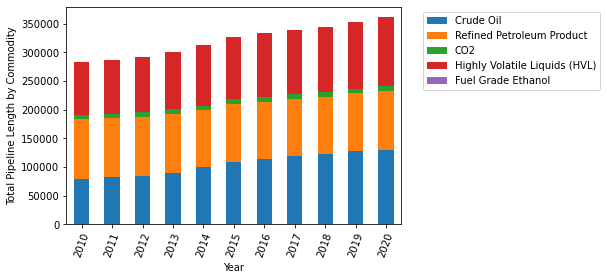

In [44]:
#Stacked bar graph
df_commodity.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('Year') 


#y-axis labels 
plt.ylabel('Total Pipeline Length by Commodity') 

#plot title 
#plt.title('Total Pipeline Length Breakdown by Commodity Transported') 

#Legend
plt.legend(['Crude Oil', 'Refined Petroleum Product', 'CO2', 'Highly Volatile Liquids (HVL)', 'Fuel Grade Ethanol'], bbox_to_anchor=(1.05, 1), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\HL Plots\\commodity'
plt.savefig(plot_path, dpi=300,bbox_inches='tight') 

#display 
plt.show();

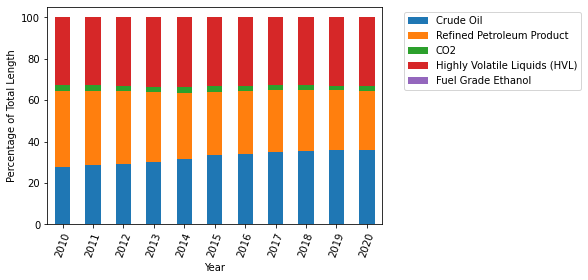

In [45]:
#Stacked bar graph
df_commodity_percent.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('Year') 


#y-axis labels 
plt.ylabel('Percentage of Total Length') 

#plot title 
#plt.title('Ditribution of Pipeline Length based on Commodity') 

#Legend
plt.legend(['Crude Oil', 'Refined Petroleum Product', 'CO2', 'Highly Volatile Liquids (HVL)', 'Fuel Grade Ethanol'],bbox_to_anchor=(1.05, 1), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\HL Plots\\commodity_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight') 

#display 
plt.show();

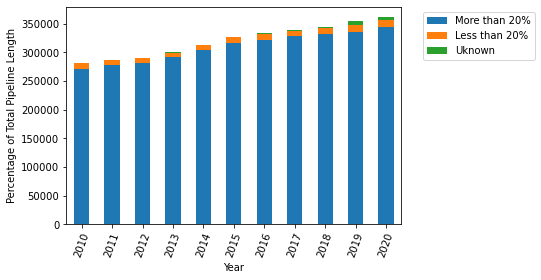

In [46]:
#Stacked bar graph
df_smys.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('Year') 


#y-axis labels 
plt.ylabel('Percentage of Total Pipeline Length') 
#plt.ylim([0, 500000])

#plot title 
#plt.title('Ditribution of Pipeline Length by SMYS') 

#Legend
plt.legend(['More than 20%', 'Less than 20%', 'Uknown'], bbox_to_anchor=(1.05, 1), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\HL Plots\\smys_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight') 

#display 
plt.show();

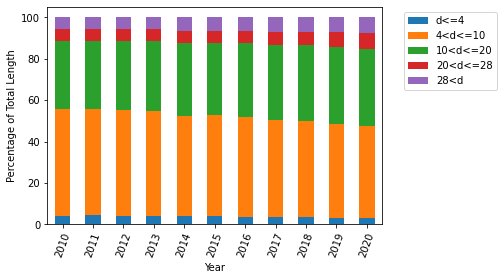

In [47]:
#Stacked bar graph
df_diameter_short_percent.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('Year') 


#y-axis labels 
plt.ylabel('Percentage of Total Length') 


#plot title 
#plt.title('Ditribution of Pipeline Length by Pipe Diameter') 

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
#for n in df_diameter_short_percent:
    #for i, (cs, ab, pc) in enumerate(zip(df_diameter_short_percent.cumsum(1)[n], df_diameter_short_percent[n], df_diameter_short_percent[n])):
        #plt.text(i, cs - ab / 2, str(np.round(pc, 1)) + '%', 
                 #va = 'center', ha = 'center', rotation = 90, fontsize = 7)

#save plot 
plot_path = os.getcwd() + '\\HL Plots\\diameter_short_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [49]:
#pd.pivot_table(data=df_km,index='REPORT_YEAR',values=['PARTDONCPB','PARTDONCPC','PARTDONCUB','PARTDONCUC'],aggfunc=np.sum)

PARTDONCPB      4476.543509
PARTDONCPC    313733.633691
PARTDONCUB       346.673343
PARTDONCUC      1173.148876
dtype: float64

In [50]:
#calculating 10-year average length for each attribute
km_average = pd.DataFrame(df_km.mean(0), columns = ['Average Length km'])
cp_average = pd.DataFrame(df_cp.mean(0), columns = ['Average Length km'])
material_average = pd.DataFrame(df_material.mean(0), columns = ['Average Length km'])
diameter_short_average = pd.DataFrame(df_diameter_short.mean(0), columns = ['Average Length km'])

#because 2020-2029 installation period has only 1 year of data, the average is the same as 2020 year
installation_average = pd.DataFrame(df_installation.mean(0), columns = ['Average Length km'])
installation_average.at['PARTI202029', 'Average Length km'] = df_installation.at[2020, 'PARTI202029']

smys_average = pd.DataFrame(df_smys.mean(0), columns = ['Average Length km'])
commodity_average = pd.DataFrame(df_commodity.mean(0), columns = ['Average Length km'])

In [51]:
mileage_df_hl_average = pd.concat([km_average, cp_average, material_average, commodity_average, diameter_short_average, installation_average, smys_average], axis = 0)

In [261]:
mileage_df_hl_average.to_csv('mileage_df_hl_average.csv')

In [52]:
mileage_df_hl_percent_average = pd.DataFrame(mileage_df_hl_percent.mean(0), columns = ['Percentage'])

In [54]:
#because 2020-2029 installation period has only 1 year of data, the average is the same as 2020 year
mileage_df_hl_percent_average.at['PARTI202029','Percentage'] = mileage_df_hl_percent.at[2020,'PARTI202029']
mileage_df_hl_percent_average= mileage_df_hl_percent_average.drop(['Average Length km'], axis = 1)

In [276]:
mileage_df_hl_percent_average.to_csv('mileage_df_hl_percent_average.csv')